In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf  # if you installed TensorFlow
print("All packages imported successfully!")


All packages imported successfully!


In [32]:
import plotly
import bokeh
import requests
from bs4 import BeautifulSoup
import sqlalchemy
import sqlite3  # This should work as sqlite is part of Python's standard library

print("All project-specific packages imported successfully!")


All project-specific packages imported successfully!


In [ ]:
import requests
import pandas as pd
import os

# Alpha Vantage API key
alpha_api_key = os.getenv("ALPHA_API_KEY", "5OM8ZCNGL507NBDE")
symbol = "IBM"  # Change as needed
interval = "5min"  # Change as needed
alpha_url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&apikey={alpha_api_key}"

try:
    # Fetch API data
    response = requests.get(alpha_url)
    response.raise_for_status()  # Raise an HTTPError for bad responses
    data = response.json()

    # Debug: Display the raw response if structure is invalid
    if f"Time Series ({interval})" not in data:
        print("Raw API Response:")
        print(data)  # Print full response for debugging
        raise ValueError("Invalid response structure or rate limit exceeded")

    # Parse the response into a DataFrame
    time_series_data = data[f"Time Series ({interval})"]
    df = pd.DataFrame.from_dict(time_series_data, orient="index")
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

    # Convert numeric columns
    numeric_columns = ["1. open", "2. high", "3. low", "4. close", "5. volume"]
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # Display the first few rows
    print("Stock Data:")
    print(df.head())

except requests.exceptions.RequestException as e:
    print(f"Request error: {e}")

except ValueError as ve:
    print(f"Data processing error: {ve}")


Raw API Response:
{'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
Data processing error: Invalid response structure or rate limit exceeded


In [34]:
# FRED API key
fred_api_key = "c1ee98d82c3b04bfe44207b8ccd03a97"

# URL for 10-year Treasury Yield
fred_url = f"https://api.stlouisfed.org/fred/series/observations?series_id=DGS10&api_key={fred_api_key}&file_type=json"

# Fetch data
response = requests.get(fred_url)
fred_data = response.json()

# Display the 10-year Treasury yield data
print(fred_data)


{'realtime_start': '2024-11-15', 'realtime_end': '2024-11-15', 'observation_start': '1600-01-01', 'observation_end': '9999-12-31', 'units': 'lin', 'output_type': 1, 'file_type': 'json', 'order_by': 'observation_date', 'sort_order': 'asc', 'count': 16403, 'offset': 0, 'limit': 100000, 'observations': [{'realtime_start': '2024-11-15', 'realtime_end': '2024-11-15', 'date': '1962-01-02', 'value': '4.06'}, {'realtime_start': '2024-11-15', 'realtime_end': '2024-11-15', 'date': '1962-01-03', 'value': '4.03'}, {'realtime_start': '2024-11-15', 'realtime_end': '2024-11-15', 'date': '1962-01-04', 'value': '3.99'}, {'realtime_start': '2024-11-15', 'realtime_end': '2024-11-15', 'date': '1962-01-05', 'value': '4.02'}, {'realtime_start': '2024-11-15', 'realtime_end': '2024-11-15', 'date': '1962-01-08', 'value': '4.03'}, {'realtime_start': '2024-11-15', 'realtime_end': '2024-11-15', 'date': '1962-01-09', 'value': '4.05'}, {'realtime_start': '2024-11-15', 'realtime_end': '2024-11-15', 'date': '1962-01-

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Sample data initialization (replace with your actual data loading code)
data = {
    "4. close": [150, 152, 153, 149, 148, 150, 155, 160, 162, 159]
}
df = pd.DataFrame(data)

# Ensure "4. close" column exists
if "4. close" not in df.columns:
    raise ValueError("The DataFrame does not contain the required '4. close' column.")

# Convert "4. close" to numeric (if necessary)
df["4. close"] = pd.to_numeric(df["4. close"], errors="coerce")

# Calculate the moving average
df["moving_avg"] = df["4. close"].rolling(window=5).mean()

# Calculate volatility (standard deviation)
df["volatility"] = df["4. close"].rolling(window=5).std()

# Drop rows with NaN values in features or target
df = df.dropna()

# Define features (X) and target (y)
X = df[["4. close", "moving_avg"]]
y = df["volatility"]

# Ensure proper alignment of X and y
X, y = X.align(y, join="inner", axis=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, "model.pkl")

# Evaluate the model
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Model RMSE: {rmse}")

# Optional: Display the processed DataFrame
print("Processed DataFrame:")
print(df)


Model RMSE: 1.5022513222471994
Processed DataFrame:
   4. close  moving_avg  volatility
4       148       150.4    2.073644
5       150       150.4    2.073644
6       155       151.0    2.915476
7       160       152.4    5.029911
8       162       155.0    6.082763
9       159       157.2    4.764452


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


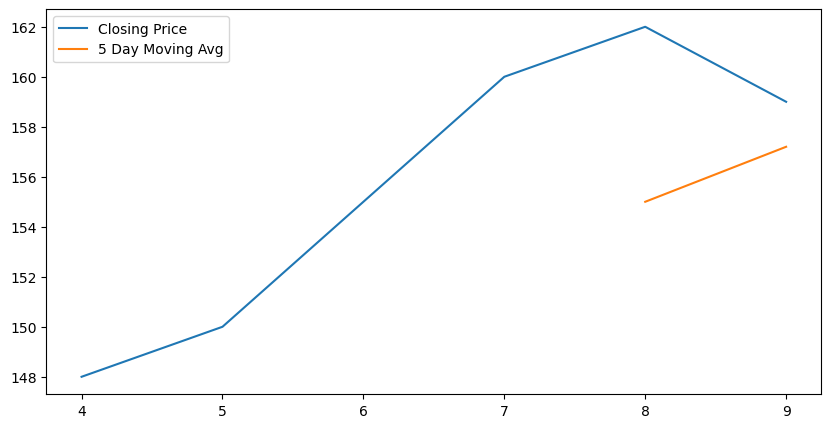

In [36]:
import matplotlib.pyplot as plt

# Plot stock price and moving average
df["4. close"] = pd.to_numeric(df["4. close"])  # Convert closing prices to numeric
df["5_day_moving_avg"] = df["4. close"].rolling(window=5).mean()

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["4. close"], label="Closing Price")
plt.plot(df.index, df["5_day_moving_avg"], label="5 Day Moving Avg")
plt.legend()
plt.show()


In [37]:
# Calculate volatility (standard deviation of closing prices over a 5-day window)
df["volatility"] = df["4. close"].rolling(window=5).std()

# Fill any NaN values created by rolling calculation with the mean volatility (as an example)
df["volatility"].fillna(df["volatility"].mean(), inplace=True)

# Use volatility as the target risk score
y = df["volatility"]


/var/folders/0r/_t7kcrx95hb4fyf8t8xpsmwc0000gn/T/ipykernel_68343/3190036009.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["volatility"].fillna(df["volatility"].mean(), inplace=True)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Apply 5-day moving average for training (rename column to moving_avg)
df["moving_avg"] = df["4. close"].rolling(window=5).mean()

# Define X and y with the calculated risk score
X = df[['4. close', '5_day_moving_avg']].dropna()
y = df["volatility"].dropna()  # Now defined as the volatility

# Align X and y by dropping any rows with missing values
X, y = X.align(y, join='inner', axis=0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions and calculate RMSE
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")



RMSE: 1.318310830469576


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
print(stock_df.head())  # Check if "moving_avg" column is created


NameError: name 'stock_df' is not defined

In [ ]:
import sys
print(sys.executable)



/opt/homebrew/Caskroom/miniconda/base/bin/python


In [ ]:
!pip install streamlit


In [ ]:
import sys
print(sys.executable)


/opt/homebrew/Caskroom/miniconda/base/bin/python


In [ ]:
import joblib


In [ ]:
joblib.dump(model, "model.pkl")

['model.pkl']

In [ ]:
import os



In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler for reuse
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Predictions
predictions = model.predict(X_test)

# Metrics
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")


RMSE: 0.0470491304015604
MAE: 0.03499690102440779
R2 Score: 0.7140847372671782


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1]:
import time
time.sleep(15)  # Wait for 15 seconds between API calls
